<a href="https://colab.research.google.com/github/Akriti-kumari16/Airbnb_NYC_2019.csv/blob/main/project_on_myntra_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Unsupervised ML - Myntra Online Retail Customer Segmentation

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Akriti kumari

# **Project Summary -**

Myntra is a leading Indian fashion e-commerce company known for its wide range of clothing, accessories, and lifestyle products. While Myntra is recognized primarily for fashion, this dataset relates to the company's online retail operations for Myntra Gifts Ltd., a UK-based division specializing in unique all-occasion giftware. This dataset spans transactions from December 1, 2009, to December 9, 2011, and includes detailed records of sales made through Myntra Gifts Ltd.’s non-store online platform. The dataset provides a thorough snapshot of the company's international online retail activities during this period.

# **GitHub Link -**

### <b> Problem Description: </b>

#### In this case study, your task is to identify major customer segments on a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

### <b> Data Description: </b>

#### <b>Attribute Information: </b>

* #### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* #### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* #### Description: Product (item) name. Nominal.
* #### Quantity: The quantities of each product (item) per transaction. Numeric.
* #### InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
* #### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* #### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* #### Country: Country name. Nominal, the name of the country where each customer resides.

### **Import the libraries and the dataset to understand the variables present:**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [18,7]
sns.set(rc={'figure.figsize':(18,7)})

<ipython-input-1-9959a3fe7d55>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [4]:
# loading the data
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# loading the data
cust_df = pd.read_csv('/content/drive/MyDrive/Online Retail.csv')
cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
# last 5 rows of the data
cust_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [ ]:
# number of records present
len(cust_df)

541909

In [ ]:
# shape of the dataset
cust_df.shape

(541909, 8)

In [ ]:
# columns in the dataset
cust_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

* The shape of our dataset is (541909, 8) which means the dataset has 541909 records and 8 columns.

In [ ]:
# check the datatypes of the features
cust_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

## **Data Summary:**

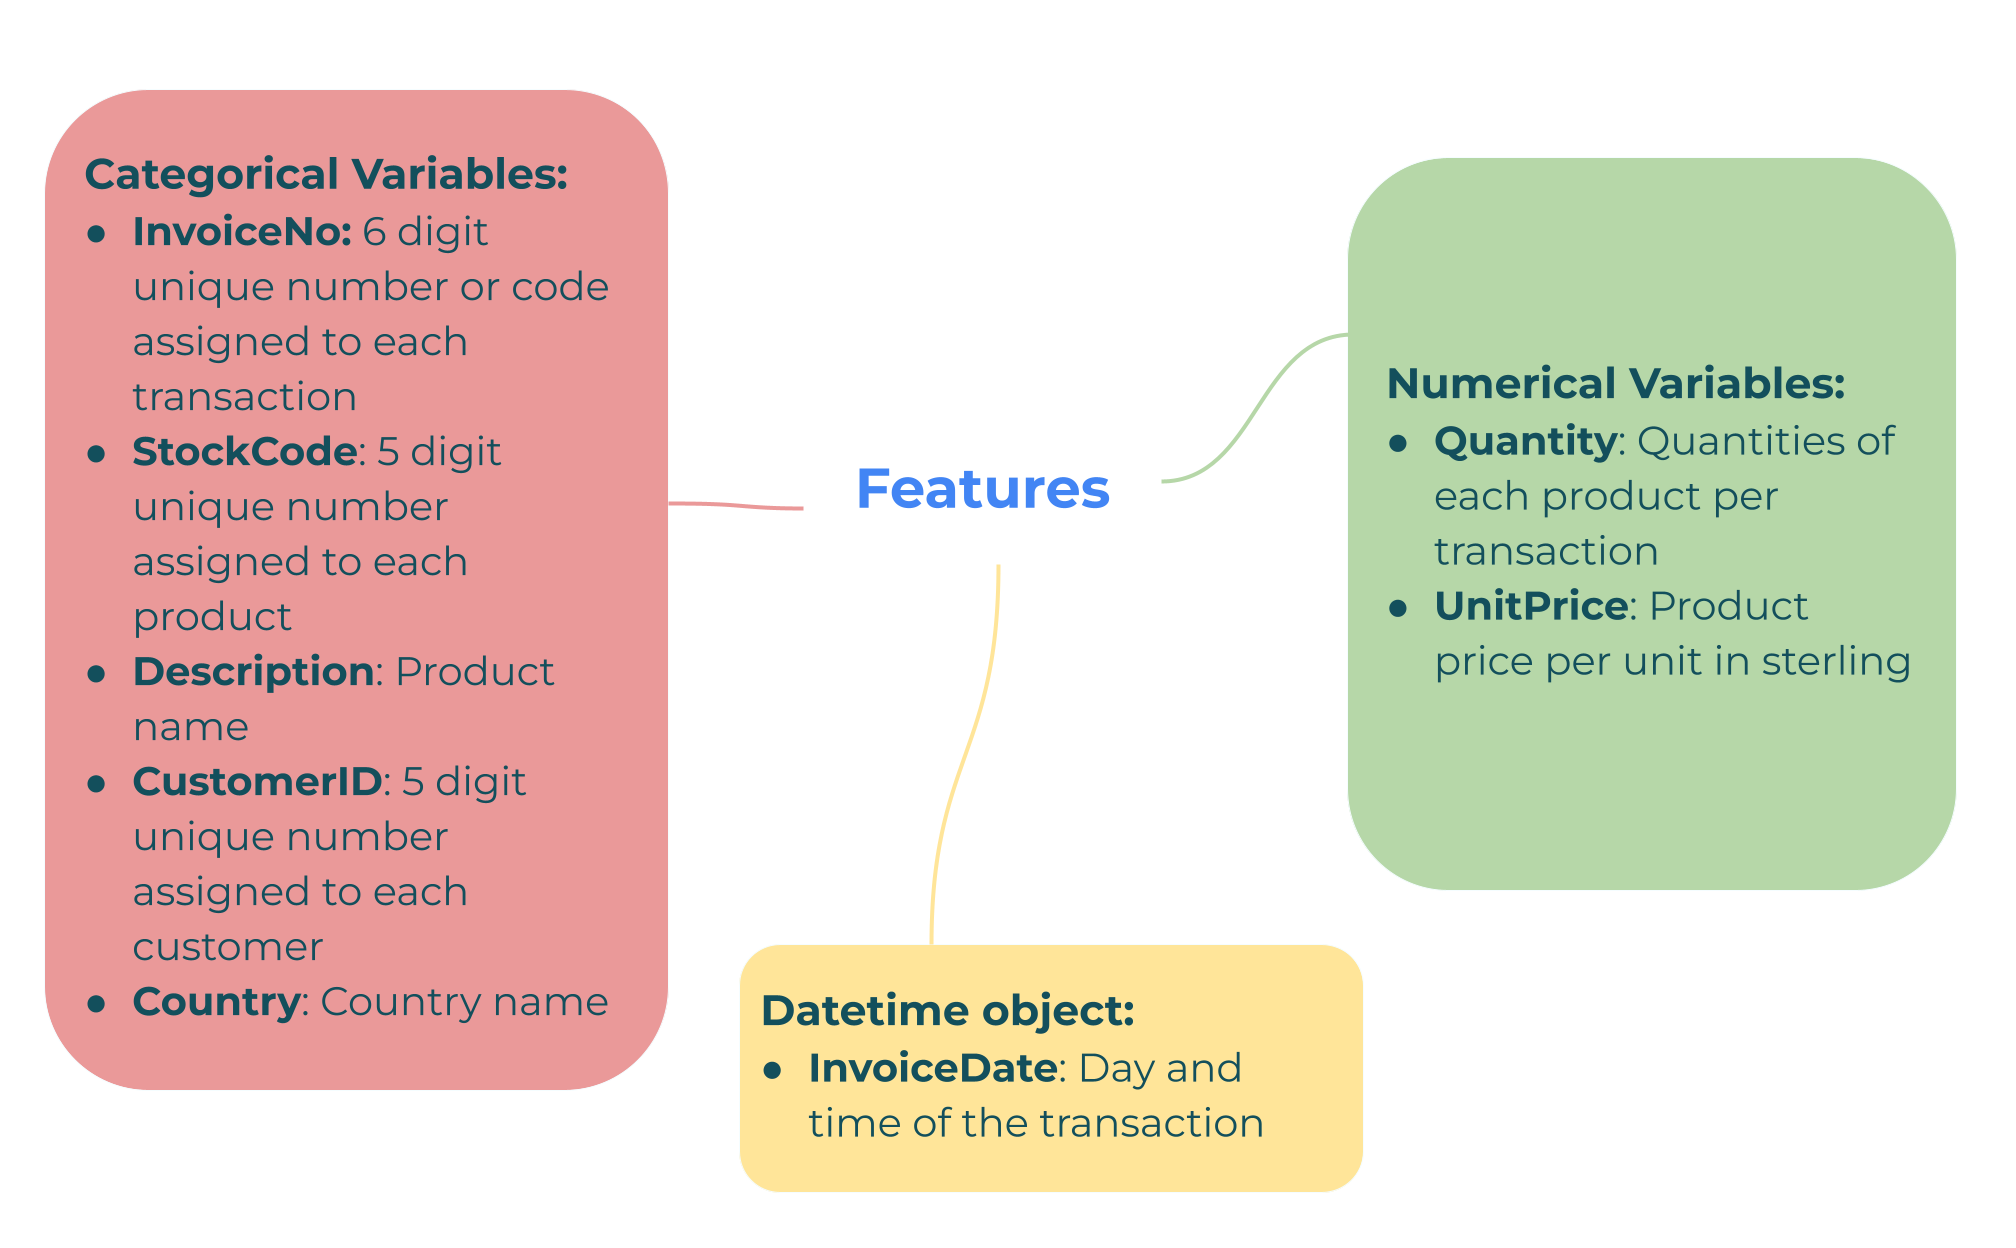

### **Information/Description of the Data:**

In [ ]:
# check information of the dataset
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# description of the dataset
cust_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


* The dataset contains few null values in the Description and CustomerID column. We will treat them soon before EDA.

* The Quantity and UnitPrice column shows the minimum values as negative and as per our knowledge these values might be due to the cancelled orders.

* The distribution of Quantity and UnitPrice looks to be skewed as there's a huge difference between the 75th percentile and the maximum value.


---


### **Handling duplicates and missing values in the dataset:**

In [ ]:
# check for duplicated records
cust_df.duplicated().sum()

5268

In [ ]:
# check for missing values
cust_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

* There are 5268 duplicated records present in the data and few missing values present in Description and CustomerID columns.

In [ ]:
# drop the duplicated records and null values
cust_df.drop_duplicates(inplace=True)
cust_df.dropna(inplace=True)

In [ ]:
# check for duplicates again
cust_df.duplicated().sum()

0

In [ ]:
# check for missing values again
cust_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# check the shape of the dataset
cust_df.shape

(401604, 8)

* We have treated the missing values and the duplicated records. After removal of these values, the shape of our dataset is (401604, 8).

* We will now check for the cancelled orders.

In [ ]:
# check for order cancellations
cust_df['InvoiceNo'] = cust_df['InvoiceNo'].astype('str')
cust_df[cust_df['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


* There are 8872 records where the orders are cancelled and the quantity contains a negative value.

* We will drop these cancelled order records from our analysis.

In [ ]:
# consider only the non cancelled orders
cust_df = cust_df[~cust_df['InvoiceNo'].str.startswith('C')]

# check the shape of the data after removing cancelled orders
cust_df.shape

(392732, 8)

In [ ]:
# description of the dataset
cust_df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


* There are no negative values in the Quantity and UnitPrice column now.

* But we can still see a minimum value of 0 in the UnitPrice column which cannot be real as a store cannot sell items for free.

* We will investigate this column and remove those records.

In [ ]:
# check the columns having zero unit price
cust_df[cust_df['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/10 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/10 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/10 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/11 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/11 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/11 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/11 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/11 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/11 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/11 14:42,0.0,14410.0,United Kingdom


* There are few records with zero values in UnitPrice which cannot be true so we will drop these records.

In [ ]:
# only consider UnitPrice greater than zero
cust_df = cust_df[cust_df['UnitPrice'] > 0]

# check description of UnitPrice after dropping
cust_df['UnitPrice'].describe()

count    392692.000000
mean          3.125914
std          22.241836
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [ ]:
# first 5 rows of the data
cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
# shape of the dataset
cust_df.shape

(392692, 8)

* Our dataset is almost a cleaned one now and we can move to EDA but before that we can create some additional features for our dataset.

### **Let us create some new features (Feature Engineering):**

#### Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

In [ ]:
# convert invoicedate column into datetime format
cust_df['InvoiceDate'] = pd.to_datetime(cust_df['InvoiceDate'], format = "%m/%d/%y %H:%M")

In [ ]:
# create some new features from invoice date
cust_df['day'] = cust_df['InvoiceDate'].dt.day_name()
cust_df['year'] = cust_df['InvoiceDate'].apply(lambda x: x.year)
cust_df['month_num'] = cust_df['InvoiceDate'].apply(lambda x: x.month)
cust_df['day_num'] = cust_df['InvoiceDate'].apply(lambda x: x.day)
cust_df['hour'] = cust_df['InvoiceDate'].apply(lambda x: x.hour)
cust_df['minute'] = cust_df['InvoiceDate'].apply(lambda x: x.minute)
cust_df['month'] = cust_df['InvoiceDate'].dt.month_name()

In [ ]:
# create TotalAmount from Quantity and UnitPrice
cust_df['TotalAmount'] = cust_df['Quantity'] * cust_df['UnitPrice']

In [ ]:
# top 5 rows of the data
cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34


### **Exploratory Data Analysis:**


#### We will be discovering insights like:

  * Which products are the most and least sold ones?

  * Which countries has the most and least number of customers?

  * Distribution of the numerical features.

  * Which day had the most and least number of purchases?

  * Which month had the most and least number of purchases?

  * Which hour in a day had the most and least number of purchases?

#### **Which products are the most sold ones?**

In [ ]:
# count of each product description
desc_df = cust_df['Description'].value_counts().reset_index()
desc_df.rename(columns={'index': 'Description Name'}, inplace=True)
desc_df.rename(columns={'Description': 'Count'}, inplace=True)
desc_df.head()

,Description Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389


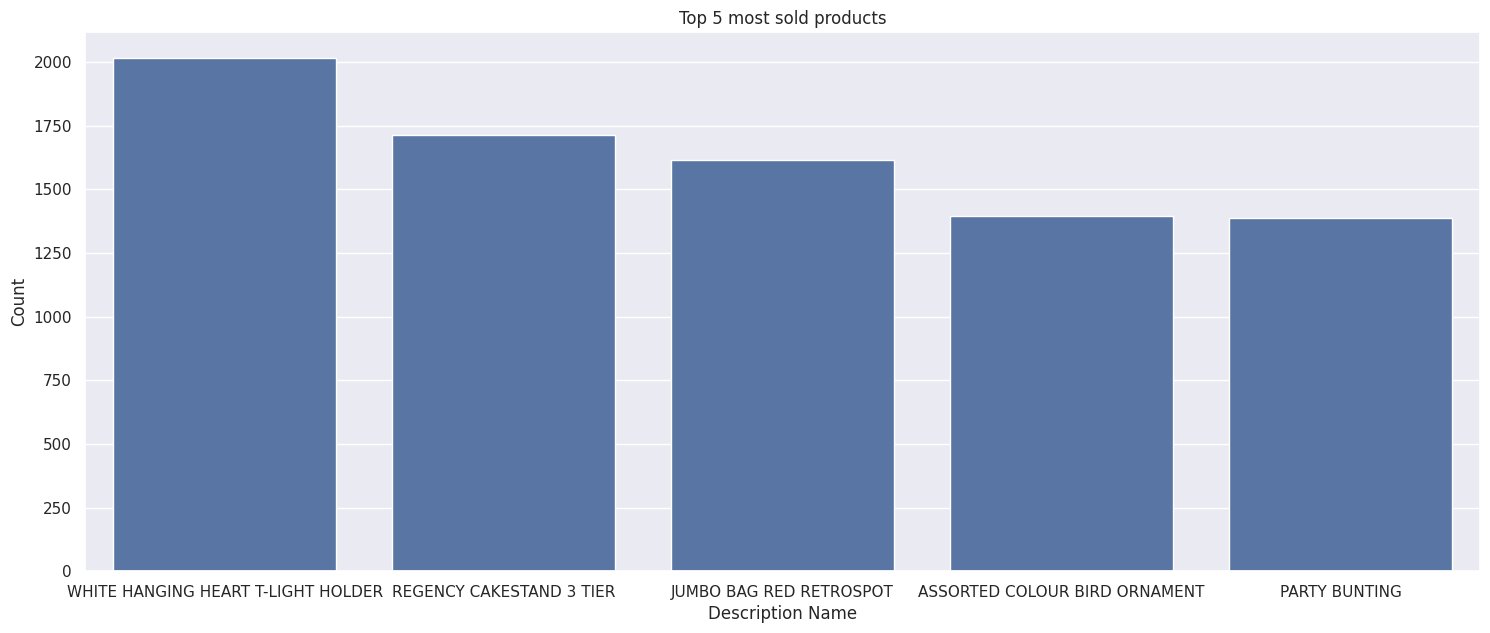

In [ ]:
# plot the top 5 most sold products
sns.barplot(x='Description Name', y='Count', data=desc_df[:5])
plt.title('Top 5 most sold products')
plt.show()

The top 5 most sold products are:

1. White Hanging Heart T-Light Holder

2. Regency Cakestand 3 Tier

3. Jumbo Bag Red Retrospot

4. Assorted Colour Bird Ornament

5. Party Bunting

#### **Which products are the least sold ones?**

In [ ]:
# bottom 5 products
desc_df.tail()

,Description Name,Count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


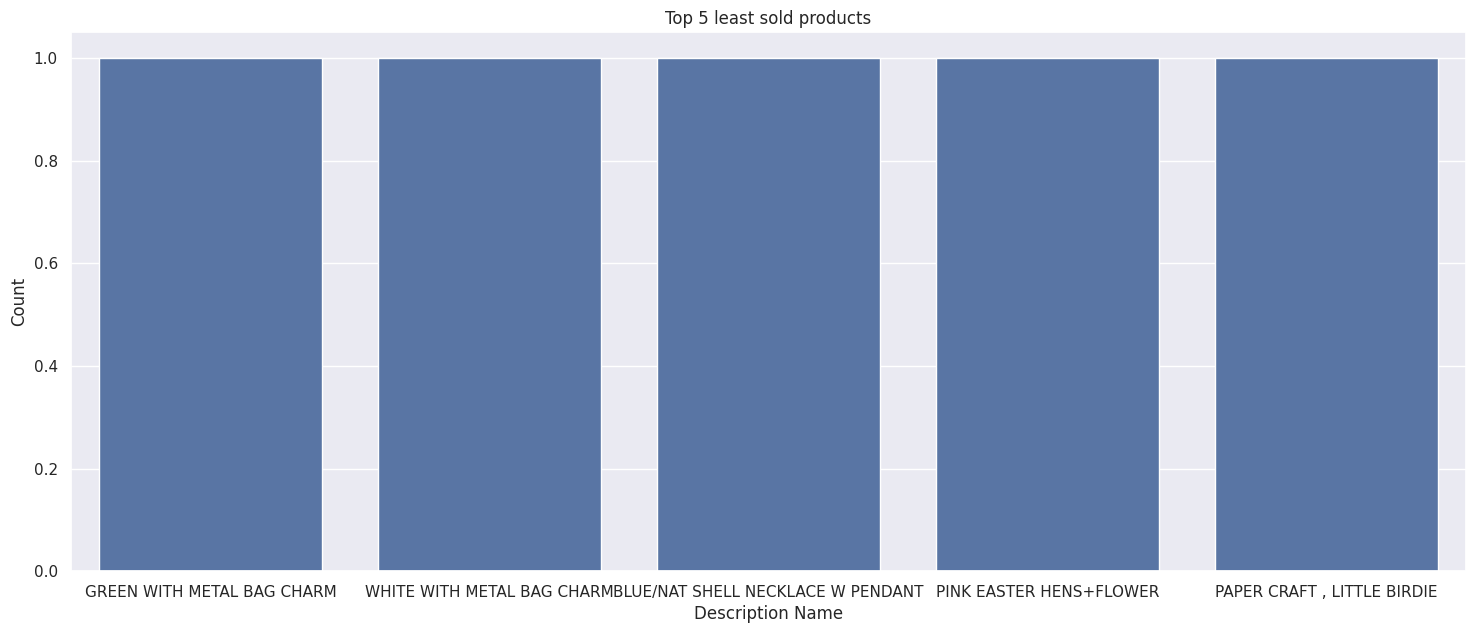

In [ ]:
# plot the top 5 least sold products
sns.barplot(x='Description Name', y='Count', data=desc_df[-5:])
plt.title('Top 5 least sold products')
plt.show()

The top 5 least sold products are:

1. Green with Metal Bag Charm

2. White with Metal Bag Charm

3. Blue/Nat Shell Necklace W Pendant

4. Pink Easter Hens + Flower

5. Paper Craft, Little Birdie

#### **Which countries has the most number of customers?**

In [ ]:
# count of customers for each country
country_df = cust_df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country Name'}, inplace=True)
country_df.rename(columns={'Country':'Count'}, inplace=True)
country_df.head()

,Country Name,Count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


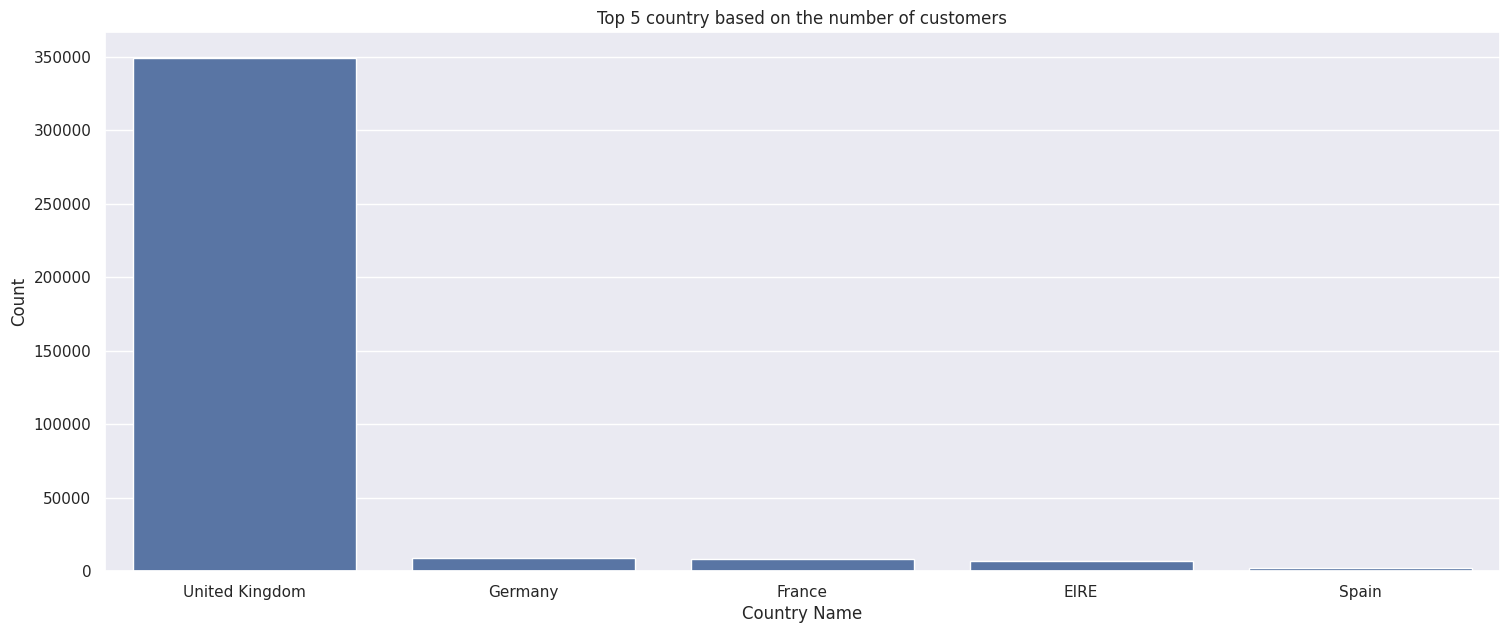

In [ ]:
# plot the top 5 country based on the number of customers
sns.barplot(x='Country Name', y='Count', data=country_df[:5])
plt.title('Top 5 country based on the number of customers')
plt.show()

* As it is an UK based company, a huge chunk of the customers are from United Kingdom only.

* There are very few customers as compared to UK for other countries.

#### **Which countries has the least number of customers?**

In [ ]:
# bottom 5 countries based on the number of customers
country_df.tail()

,Country Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


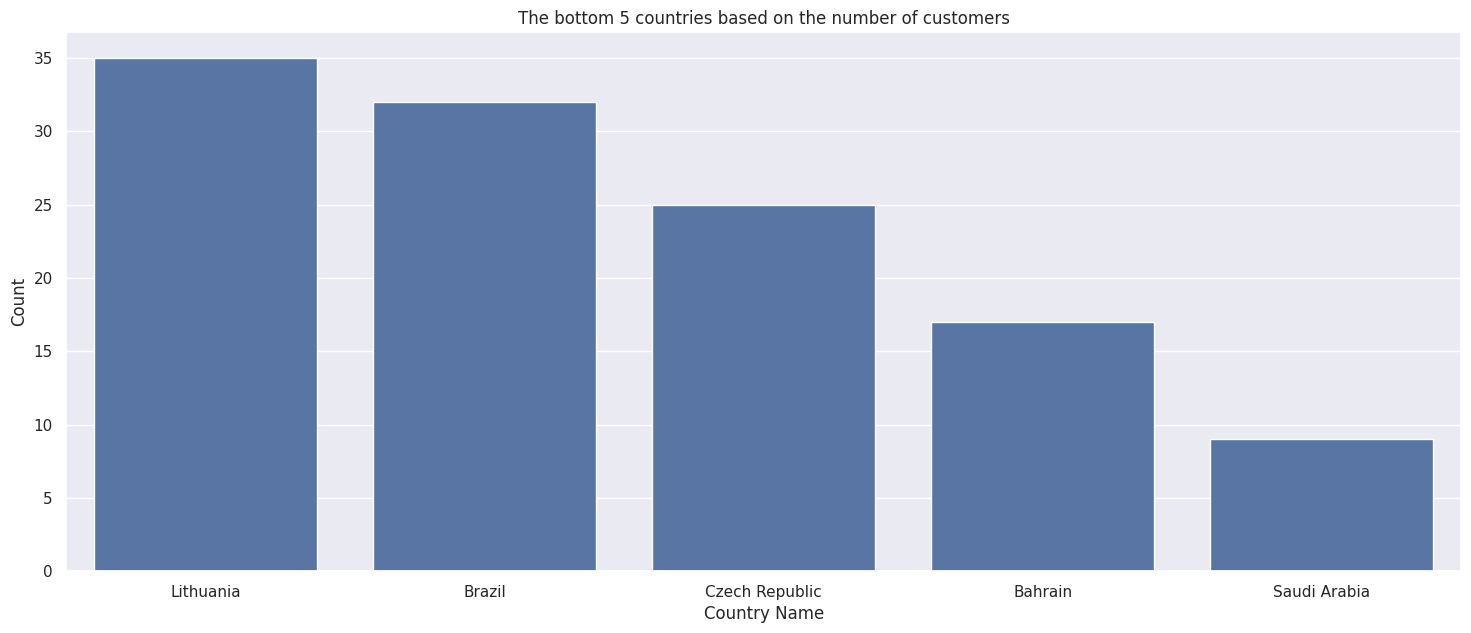

In [ ]:
# plot the bottom 5 countries based on the number of customers
sns.barplot(x='Country Name', y='Count', data=country_df[-5:])
plt.title('The bottom 5 countries based on the number of customers')
plt.show()

* Saudi Arabia has the least number of customers followed by Bahrain.

#### **How many unique customers are there?**

In [ ]:
# number of unique customers
len(cust_df['CustomerID'].unique())

4338

* There are 4338 unique customers present in the whole transactional dataset.

#### **What is the order share of the top 10 customers?**

In [ ]:
# order share of top 10 customers
share_df = (cust_df['CustomerID'].value_counts()/sum(cust_df['CustomerID'].value_counts()) * 100).reset_index()
share_df.columns = ['Customer ID', 'Order Share']
share_df.head(10).cumsum()

,Customer ID,Order Share
0,17841.0,1.954713
1,32752.0,3.398592
2,46848.0,4.700121
3,59596.0,5.823648
4,74202.0,6.505353
5,89513.0,7.107861
6,104159.0,7.636519
7,117248.0,8.098459
8,130511.0,8.522965
9,144809.0,8.939831


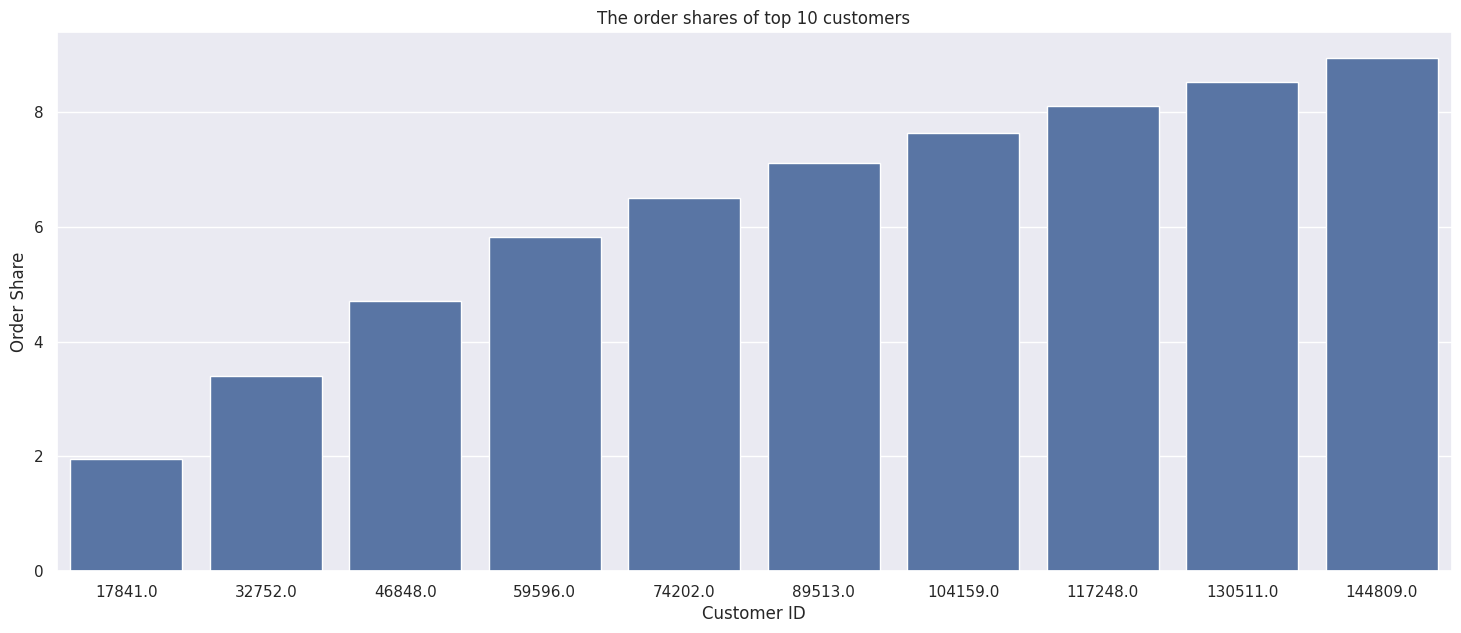

In [ ]:
# plot the top 10 customer's order share
sns.barplot(x='Customer ID', y='Order Share', data=share_df[:10].cumsum())
plt.title('The order shares of top 10 customers')
plt.show()

* We can observe that only 10 customers out of 4338 unique customers are responsible for approx 9% of the total orders.

* We can infer that these customers might be wholesalers.

### **Let us check the distribution of the numerical features:**

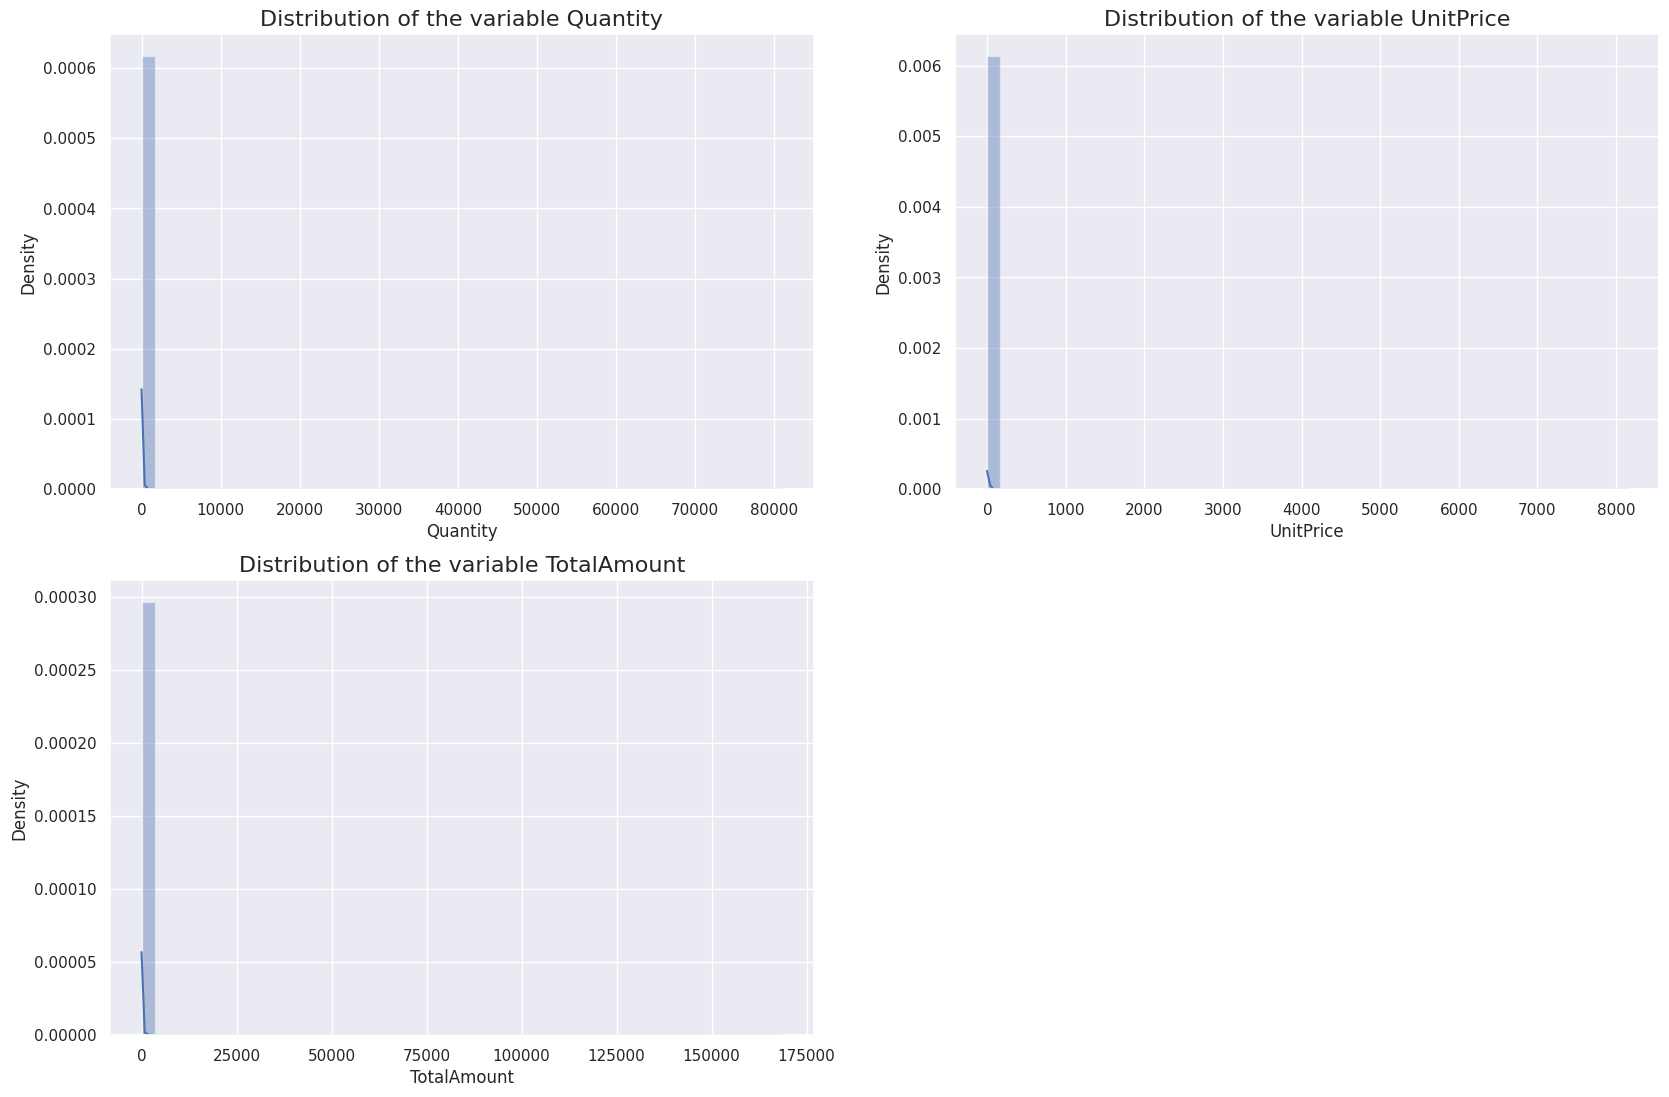

In [ ]:
# plot the distribution of the numerical features
num_features = ['Quantity', 'UnitPrice', 'TotalAmount']
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(cust_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

* The distribution of all the variables are heavily right skewed.

* We will apply log transformation on these variables to make it less skewed.

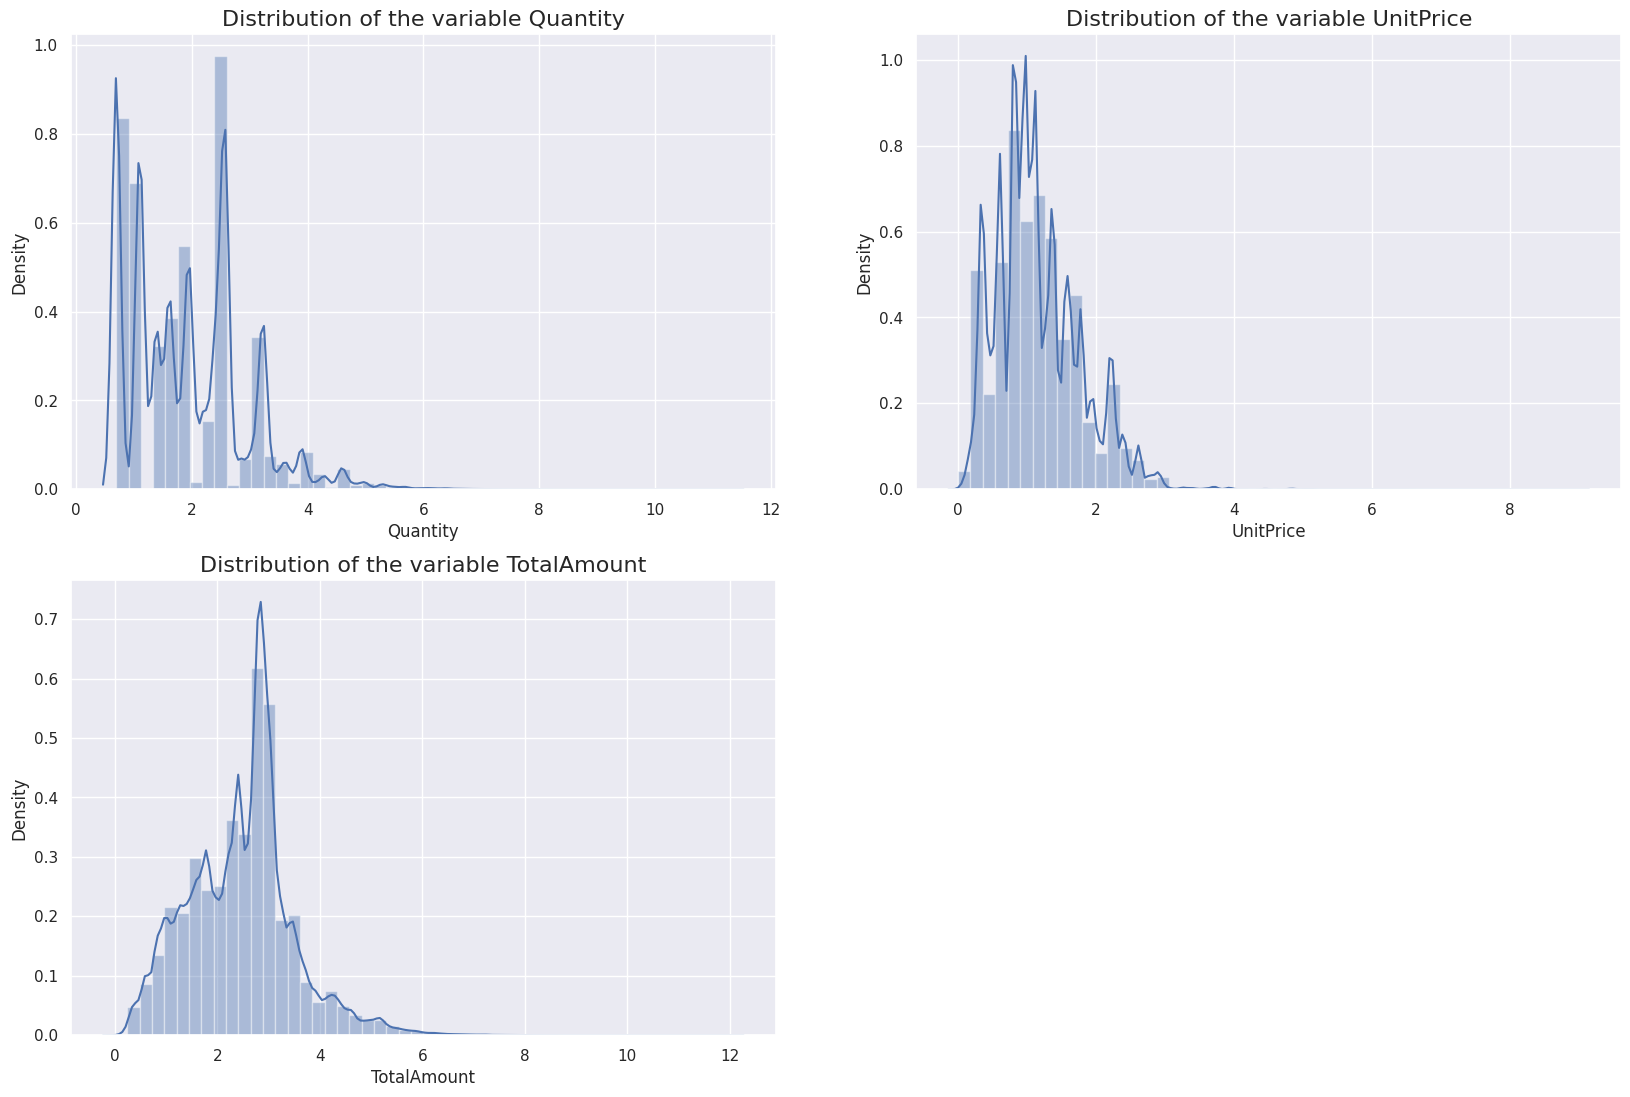

In [ ]:
# taking a log transformation
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(np.log1p(cust_df[feature]))
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

* The variables after log transformation are less skewed than before.

* It isn't a normal distribution but somewhat close to that than before.

#### **Which day of the week had the most and the least number of purchases?**

In [ ]:
# number of purchases w.r.t the day of the week
day_df = cust_df['day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day Name'}, inplace=True)
day_df.rename(columns={'day': 'Count'}, inplace=True)
day_df

,Day Name,Count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


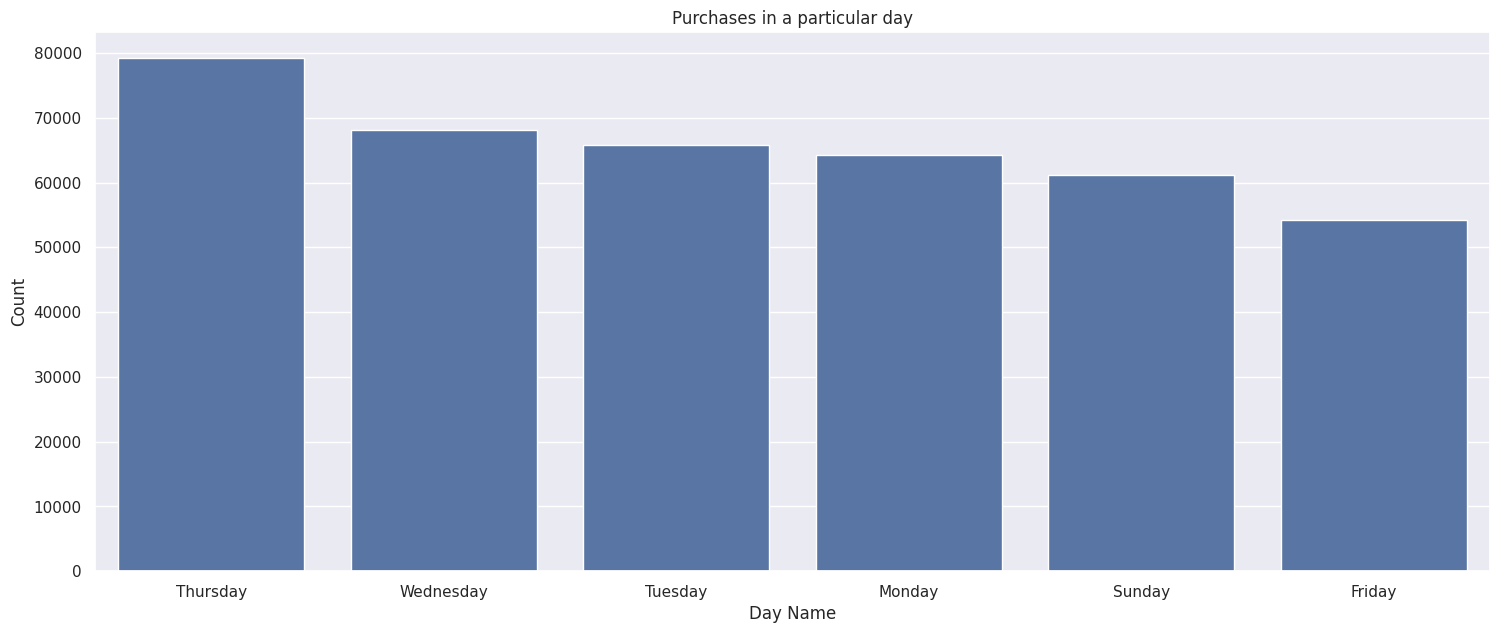

In [ ]:
# plot the number of purchases w.r.t day of the week
sns.barplot(x='Day Name', y='Count', data=day_df)
plt.title('Purchases in a particular day')
plt.show()

* Most of the customers have made a purchase in Thursday followed by Wednesday.

* Friday is the day with least number of purchases made.

#### **Which month had the most and the least number of purchases?**

In [ ]:
# number of purchases w.r.t month
month_df = cust_df['month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
month_df

,Month Name,Count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


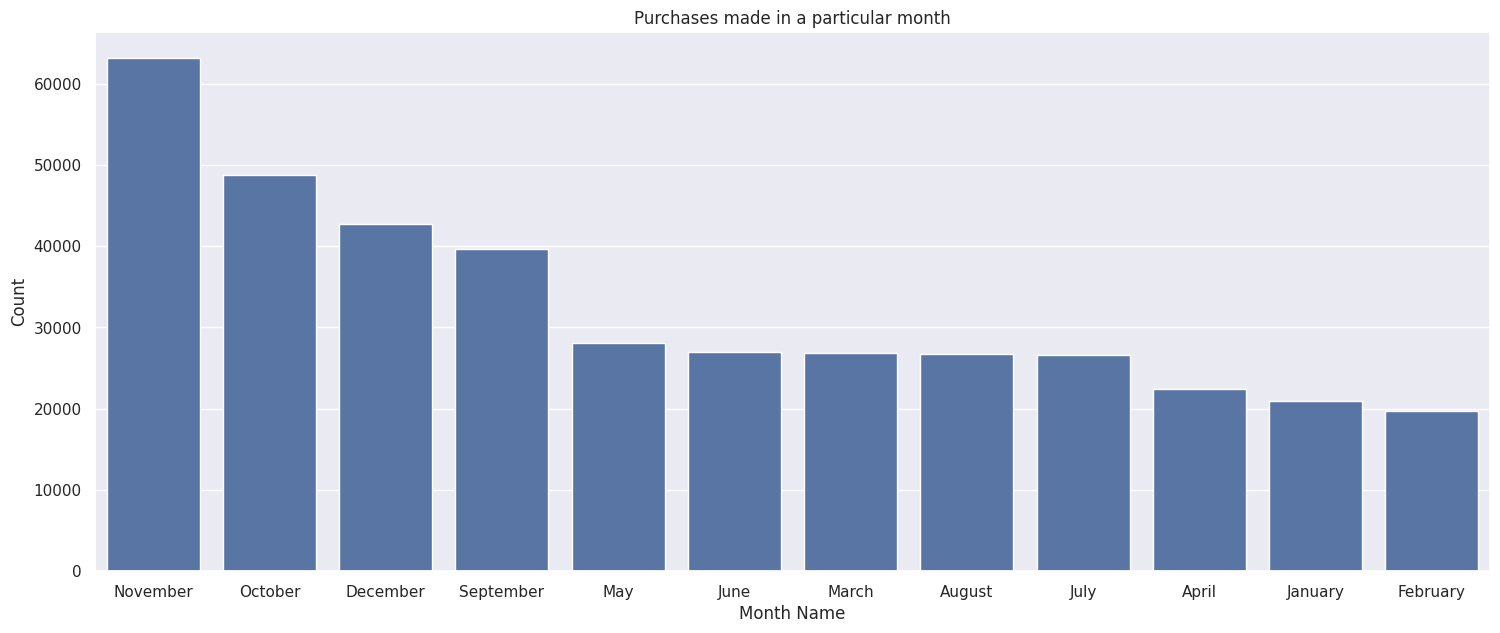

In [ ]:
# plot the number of purchases w.r.t month
sns.barplot(x='Month Name', y='Count', data=month_df)
plt.title('Purchases made in a particular month')
plt.show()

* The most number of purchases are made during October to December which is a festive season for many people.

* The least number of purchases are made during the initial months of a year, January and February which is quite obvious because as soon as the festive season ends, purchases or sales will go down.

#### **Which hour of the day had the most and the least number of purchases?**

In [ ]:
# number of purchases w.r.t hour of the day
hour_df = cust_df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

,Hour Name,Count
0,12,70938
1,13,63019
2,14,53251
3,11,48365
4,15,44790
5,10,37773
6,16,23715
7,9,21927
8,17,12941
9,8,8687


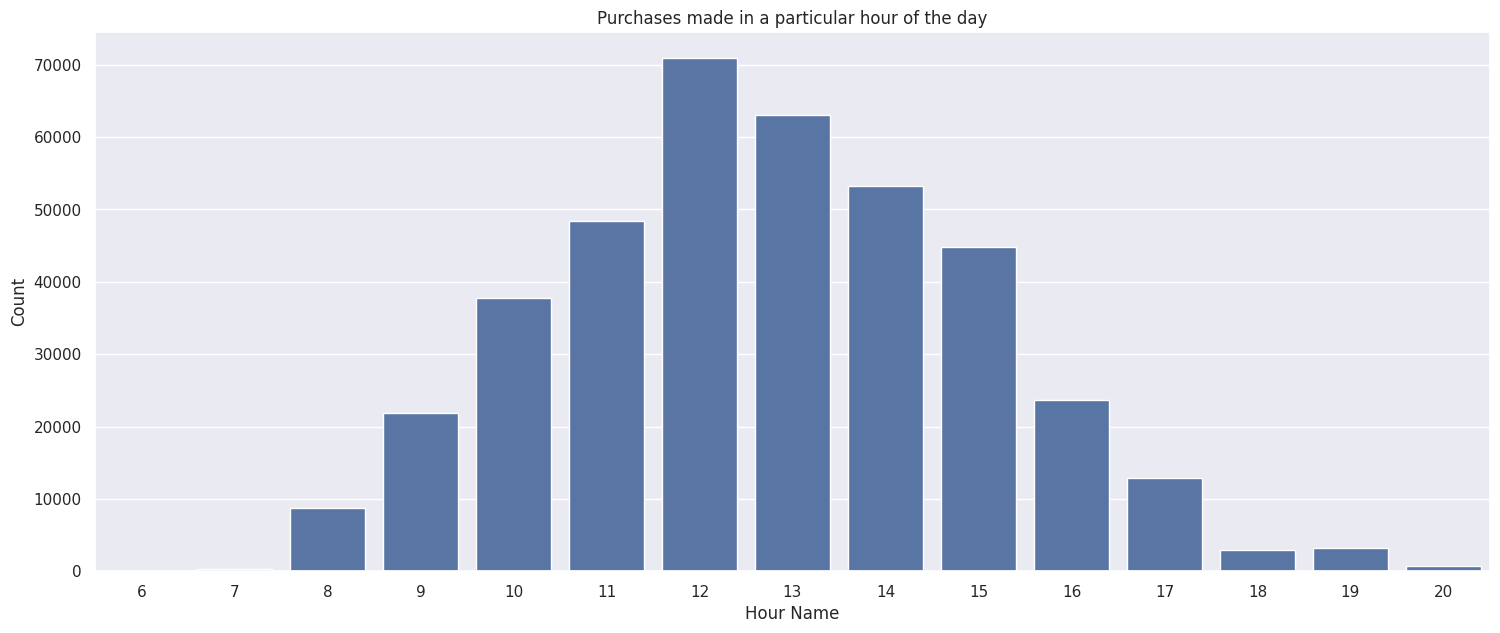

In [ ]:
# plot the number of purchases w.r.t hour of the day
sns.barplot(x='Hour Name', y='Count', data=hour_df)
plt.title('Purchases made in a particular hour of the day')
plt.show()

* Most of the purchases are around the afternoon period and a very few number of purchases during morning or evening.

* We can bucket this hour graph into morning, afternoon and evening buckets.

In [ ]:
# group the time into 3 buckets
def time_day(time):
  if (time >= 6 and time <= 11):
    return 'Morning'
  elif (time >= 12 and time <= 17):
    return 'Afternoon'
  else:
    return 'Evening'

# apply the function into the column
cust_df['time_day'] = cust_df['hour'].apply(time_day)
cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,TotalAmount,time_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning


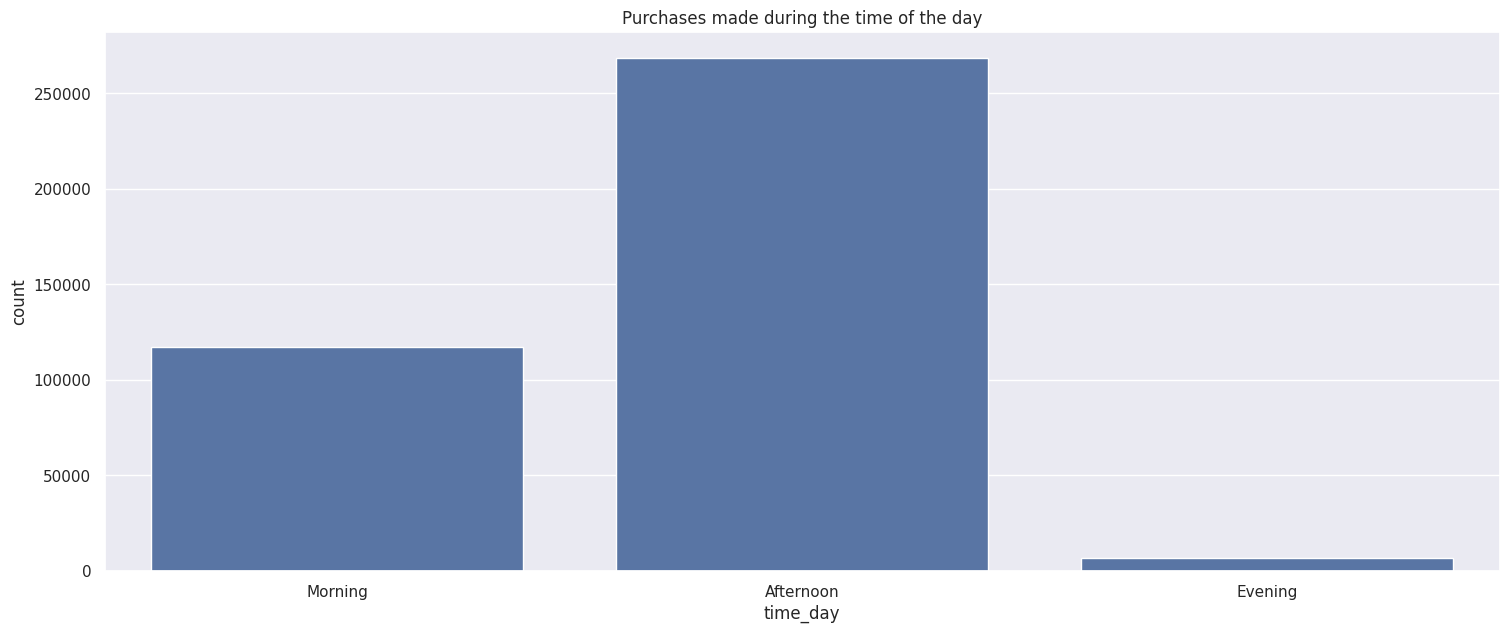

In [ ]:
# plot the number of purchases w.r.t hour again
sns.countplot(x='time_day', data=cust_df)
plt.title('Purchases made during the time of the day')
plt.show()

* Now, it is more clear that most of the purchases has occurred during the Afternoon followed by Morning and the least number of purchases during Evening.

## **Let us create the RFM Model (Recency, Frequency and Monetary):**


#### Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by measuring and analyzing spending habits.

#### The RFM model is based on three quantitative factors:

1. Recency: How recently a customer has made a purchase
2. Frequency: How often a customer makes a purchase
3. Monetary Value: How much money a customer spends on purchases

#### RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The "best" customer would receive a top score in every category.

#### These three RFM factors can be used to reasonably predict how likely (or unlikely) it is that a customer will do business again with a firm or, in the case of a charitable organization, make another donation.


### **Significance of Recency, Frequency and Monetary Value:**

#### RFM analysis allows a comparison between potential contributors or clients. It gives organizations a sense of how much revenue comes from repeat customers (versus new customers), and which levers they can pull to try to make customers happier so they become repeat purchasers.

#### Despite the useful information that is acquired through RFM analysis, firms must take into consideration that even the best customers will not want to be over-solicited, and the lower-ranking customers may be cultivated with additional marketing efforts. It works as a snapshot of the clientele and as a tool to prioritize nurturing, but it should not be taken as a license to simply do more of the same-old, same-old sales techniques.

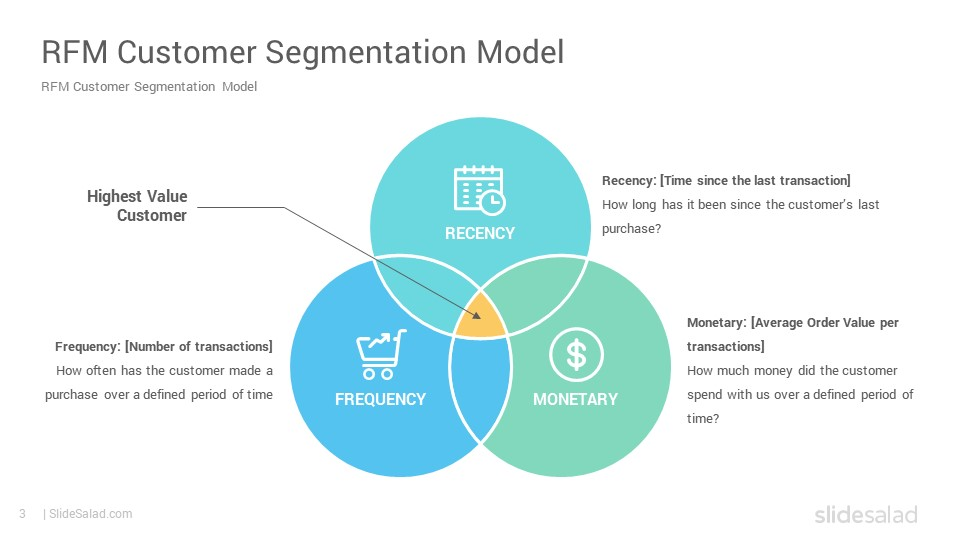

### **Performing RFM Segmentation and RFM Analysis, step by step:**

#### **Step 1:**
The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. The raw data for doing this, which should be readily available in the company’s CRM or transactional databases, can be compiled in an Excel spreadsheet or database.

#### **Step 2:**
The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool. Unless using specialized software, it’s recommended to divide the customers into four tiers for each dimension, such that each customer will be assigned to one tier in each dimension.

#### **Step 3:**
The third step is to select groups of customers to whom specific types of communications will be sent, based on the RFM segments in which they appear.

#### **Step 4:**
The fourth step actually goes beyond the RFM segmentation itself: crafting specific messaging that is tailored for each customer group. By focusing on the behavioral patterns of particular groups, RFM marketing allows marketers to communicate with customers in a much more effective manner.

#### **Filter UK data only:**

##### Being a UK based retail store and as most of the customers or a huge chunk of customers are from UK, we have decided to consider the UK based customers only for segmentation.

In [ ]:
# filter UK data only
cust_df = cust_df[cust_df['Country'] == 'United Kingdom']

# print the shape of the data
cust_df.shape

(349203, 17)

### **Calculating RFM Scores:**

In [ ]:
# calculating RFM scores
# set latest date to '2011-12-10' as the last invoice date was '2011-12-09'
latest_date = dt.datetime(2011,12,10)

# create rfm modeling scores for each customer
rfm_df = cust_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x),
                                            'TotalAmount': lambda x: x.sum()})

# convert invoice date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# rename columns to frequency, recency, monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4412,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [ ]:
# descriptive stats of the rfm dataframe
rfm_df.describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,91.742092,89.082398,1858.424654
std,99.533485,214.034542,7478.631256
min,0.000000,1.000000,3.750000
25%,17.000000,17.000000,298.185000
50%,50.000000,40.000000,644.975000
75%,142.000000,98.000000,1571.285000
max,373.000000,7676.000000,259657.300000


#### **Let us plot the distribution of Recency, Frequency and Monetary Value:**

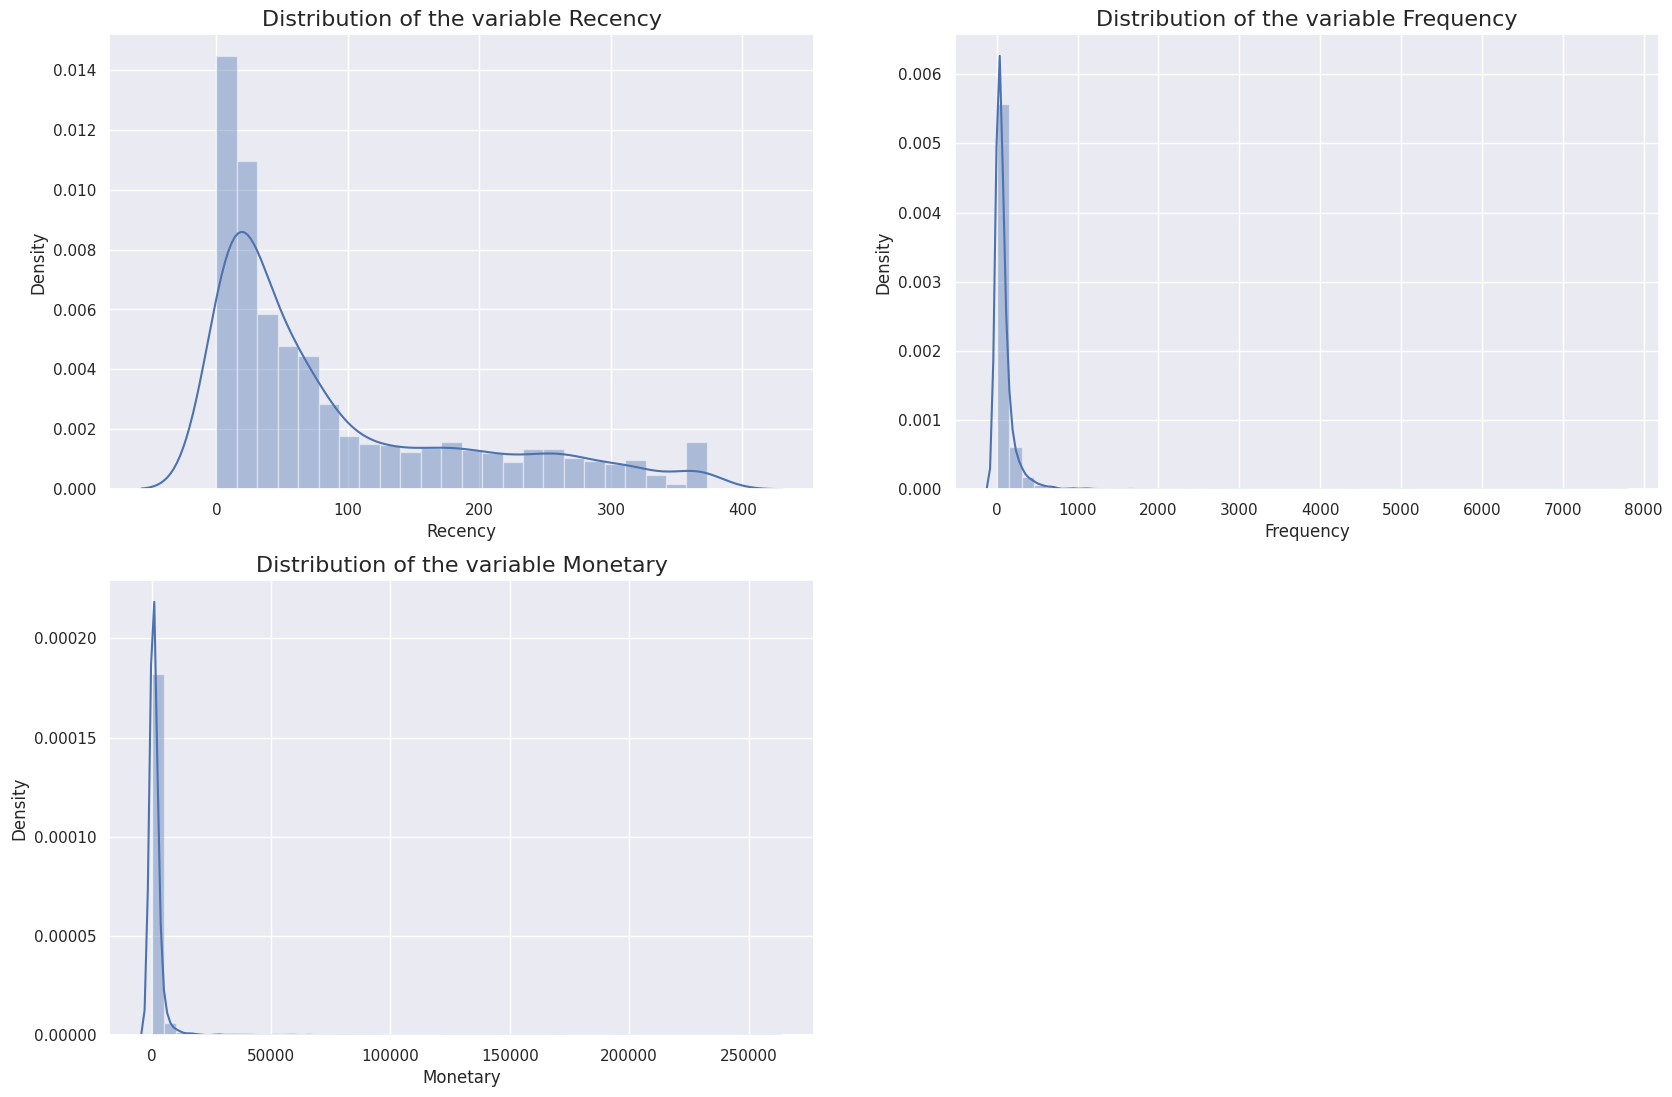

In [ ]:
# plot the distribution of the RFM values
count = 1
plt.subplots(figsize=(20,13))
for feature in rfm_df:
  plt.subplot(2,2,count)
  sns.distplot(rfm_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

### **Apply log transformation to the RFM values and plot each distribution:**

Applying a log transformation in the context of RFM (Recency, Frequency, Monetary) analysis, or any data analysis task, serves several important purposes:

1. **Normalization**: RFM metrics can vary significantly in scale. For example, monetary values can range from a few dollars to thousands, while frequency might vary from 1 to hundreds of times. A log transformation helps to normalize these scales, making it easier to compare and analyze data across different scales.

2. **Handling Skewed Data**: Many datasets, especially those involving monetary values or counts (like frequency), are often right-skewed, meaning most of the data points are clustered around the lower end of the scale with a long tail extending towards higher values. Log transformation helps in reducing the skewness, making the distribution more symmetrical and closer to a normal distribution. This is beneficial because many statistical methods and machine learning algorithms assume or perform better with data that is approximately normally distributed.

3. **Reducing the Impact of Outliers**: In RFM data, you might encounter extreme values or outliers, such as very high monetary values or unusually frequent purchases. These outliers can disproportionately influence the analysis. Log transformation reduces the impact of outliers by bringing them closer to the rest of the data points, thus providing a more balanced view.


In [ ]:
# treat the negative and zero values to handle infinite numbers during log transformation
def handle_negative(num):
  if num <= 0:
    return 1
  else:
    return num

# apply the function to recency and monetary columns
rfm_df['Recency'] = [handle_negative(x) for x in rfm_df['Recency']]
rfm_df['Monetary'] = [handle_negative(x) for x in rfm_df['Monetary']]

# apply log transfomation to RFM values
log_df = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

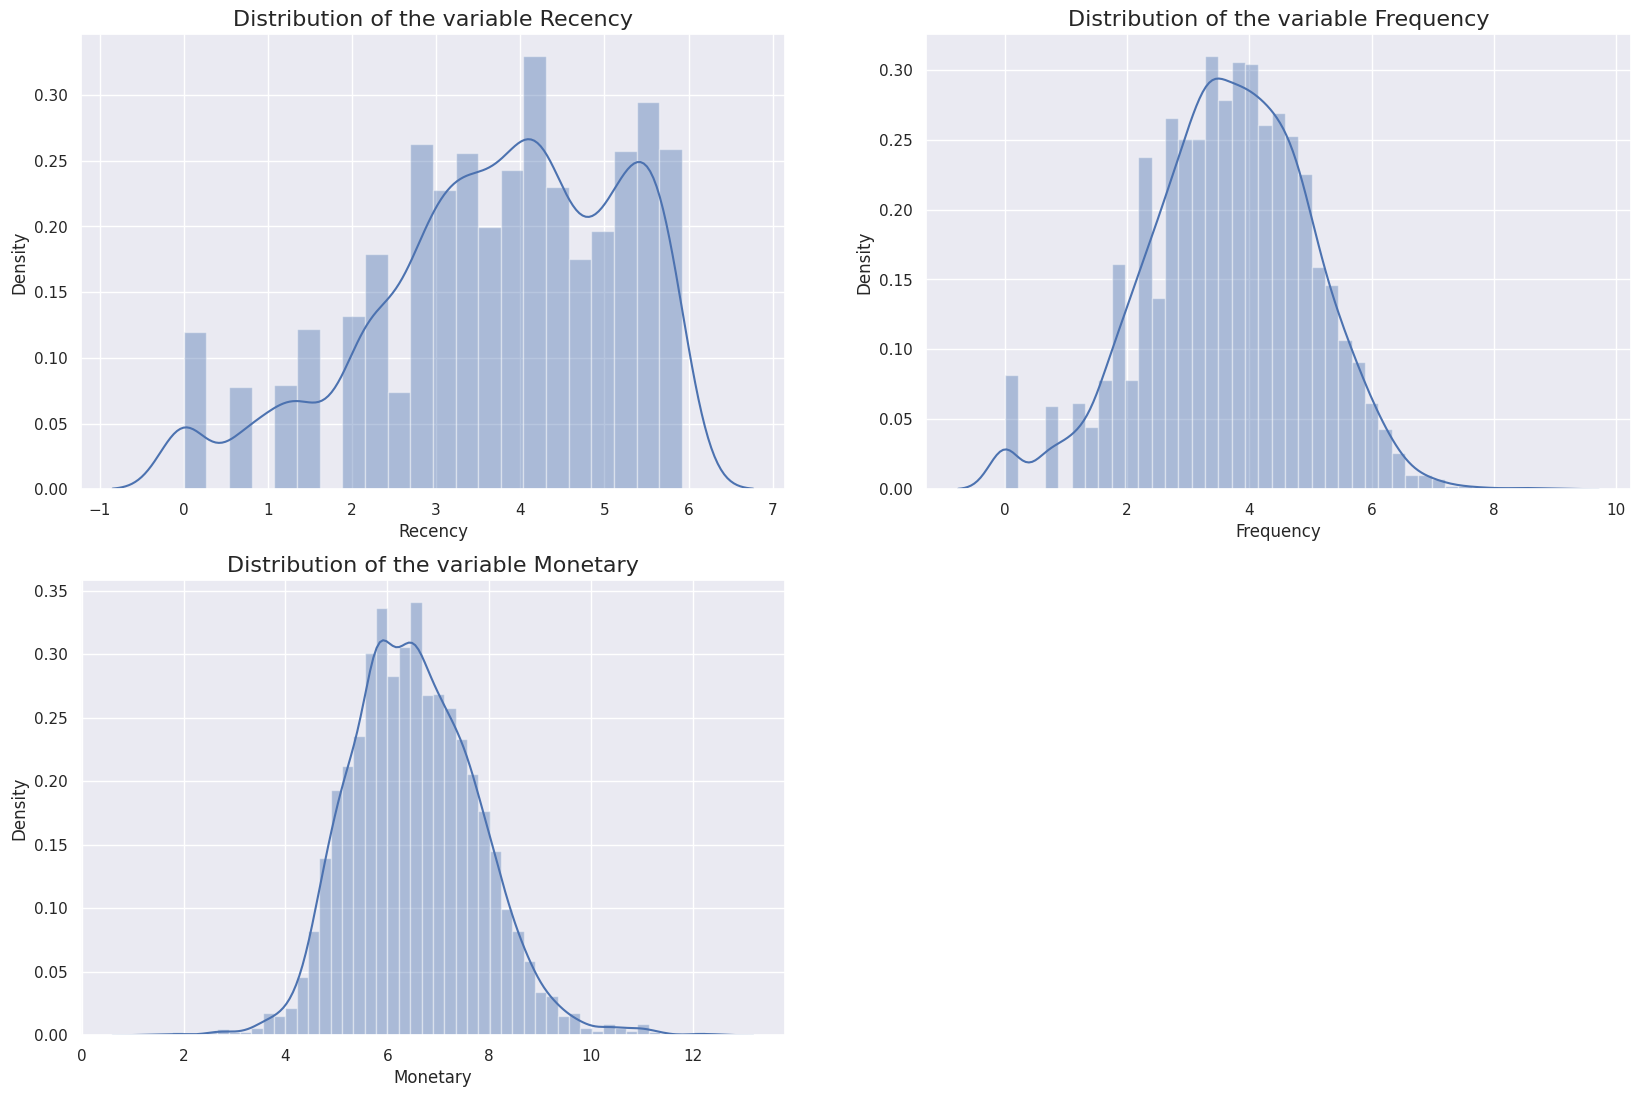

In [ ]:
# plot the log transformed distribution
count = 1
plt.subplots(figsize=(20,13))
for feature in log_df:
  plt.subplot(2,2,count)
  sns.distplot(log_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

* The distribution of Recency, Frequency and Monetary values almost looks
normal now.

In [ ]:
# apply log transformation on the original rfm dataframe
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [ ]:
# display the rfm_df
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,
12346.0,325,1,77183.60,5.783825,0.000000,11.253942
12747.0,2,103,4196.01,0.693147,4.634729,8.341889
12748.0,1,4412,33053.19,0.000000,8.392083,10.405873
12749.0,3,199,4090.88,1.098612,5.293305,8.316515
12820.0,3,59,942.34,1.098612,4.077537,6.848366


In [ ]:
features = ['Recency_log', 'Frequency_log', 'Monetary_log']

# scaling our data
X_features = rfm_df[features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)

## **Implementing K-Means Clustering:**



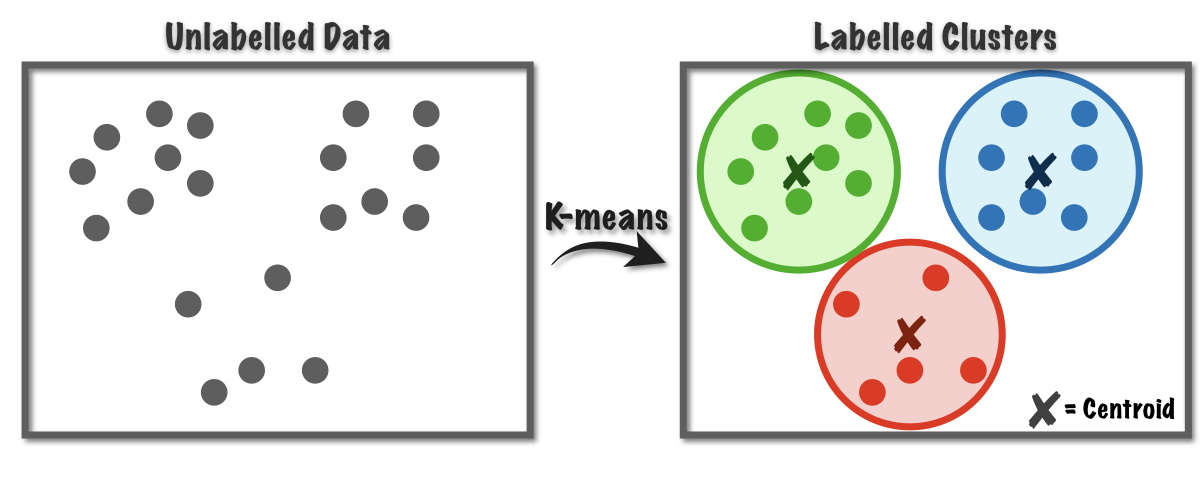

### **Applying Elbow method on Recency, Frequency and Monetary:**

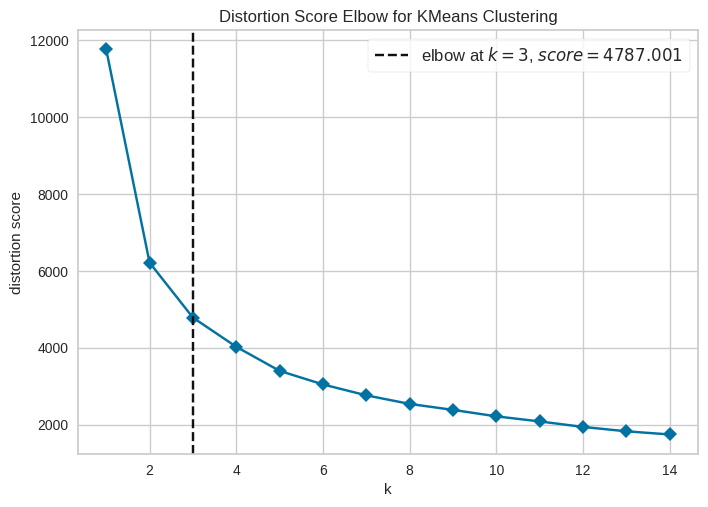

In [ ]:
# elbow method to find out the best k
from yellowbrick.cluster import KElbowVisualizer
SSE = {}
for k in range(1,15):
  km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
  km = km.fit(X)
  SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters
visualizer = KElbowVisualizer(km, k=(1,15), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.poof()
plt.show()

* From the elbow method we reach the conclusion that the optimal number of clusters is 3 for Recency, Frequency and Monetary values.

* We will again run the model with number of clusters as 3.

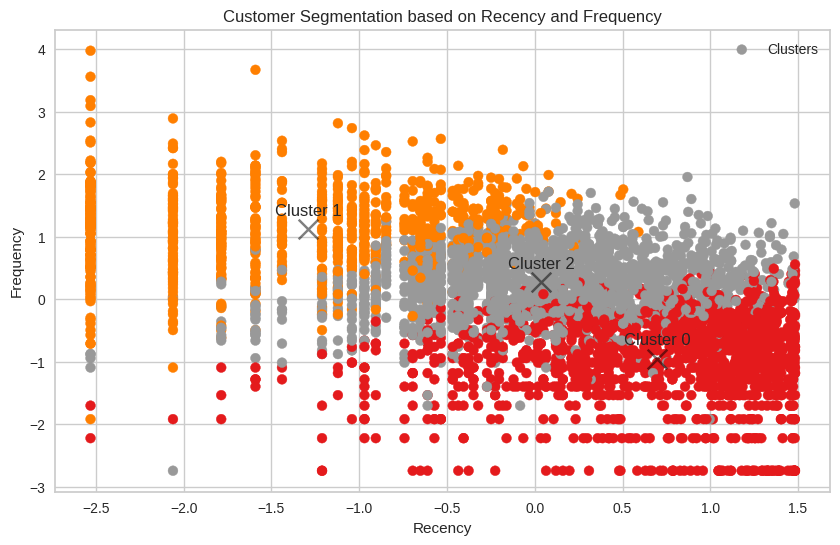

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X is your data array
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_km = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.title('Customer Segmentation based on Recency and Frequency')
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap='Set1', label='Clusters')

# Plot and annotate the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5, marker='x')
for i, center in enumerate(centers):
    plt.annotate(f'Cluster {i}', (center[0], center[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

We can observe three clusters from the KMeans model applied on Recency, Frequency and Monetary data.

### **Interpreting the Clusters with the help of RFM Group:**

#### **Now, split the RFM values into four quantiles:**

In [ ]:
# split the rfm values into four quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
# function to create R, F, M segments
def RScore(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMScore(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [ ]:
# calculate RFM segment values for each record
rfm_df['R'] = rfm_df['Recency'].apply(RScore, args=('Recency', quantiles, ))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScore, args=('Frequency', quantiles, ))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScore, args=('Monetary', quantiles, ))
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M
0,12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1
1,12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1
2,12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1
3,12749.0,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1
4,12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2


#### **Calculate RFM Group and RFM Score from the RFM segmentation:**

In [ ]:
# add RFM group column
rfm_df['RFMGroup'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

# calculate RFM score from RFM group column
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis=1)
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore
0,12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1,441,9
1,12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1,111,3
2,12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1,111,3
3,12749.0,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1,111,3
4,12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2,122,5


In [ ]:
# find the clusters for the observations in the dataset
rfm_df['Cluster'] = kmeans.labels_
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore,Cluster
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1,441,9,2
12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1,111,3,1
12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1,111,3,1
12749.0,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1,111,3,1
12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2,122,5,1


In [ ]:
# Group by cluster label and calculate mean
cluster_averages = rfm_df.groupby('Cluster').mean()
cluster_averages

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMScore
Cluster,,,,,,,,,,
0,165.282744,15.119196,286.190805,4.759947,2.386550,5.410671,3.298683,3.629245,3.564103,10.492030
1,10.912621,258.559466,5933.187633,1.830261,5.151263,8.043445,1.207524,1.288835,1.241505,3.737864
2,67.853600,69.166969,1199.700365,3.787118,4.012225,6.770923,2.425287,2.156685,2.198427,6.780399


### **Interpretation:**

1. **Cluster 0**:
   - **Recency**: High (average around 165 days)
   - **Frequency**: Low (average around 15 transactions)
   - **Monetary**: Low (average around $286)
   - **Interpretation**: Customers in this cluster are likely to be 'At-Risk' or 'Lapsed' customers. They haven't made purchases recently, and when they did, they didn't do so very frequently and didn't spend much. These customers might have been one-time buyers or occasional shoppers. Engaging them with reactivation campaigns or exploring why they haven’t returned can be a strategic move.

2. **Cluster 1**:
   - **Recency**: Very Low (average around 11 days)
   - **Frequency**: Very High (average around 259 transactions)
   - **Monetary**: Very High (average around $5933)
   - **Interpretation**: This cluster represents your 'Champions' or 'Loyal' customers. They shop frequently, recently, and spend the most. They are the most valuable segment, likely to respond positively to new offers, up-sell and cross-sell opportunities. Maintaining their high engagement level is crucial, and they can also be targeted for feedback or as brand ambassadors.

3. **Cluster 2**:
   - **Recency**: Moderate (average around 68 days)
   - **Frequency**: Moderate (average around 69 transactions)
   - **Monetary**: Moderate (average around $1200)
   - **Interpretation**: Customers in this cluster can be seen as 'Potential Loyalists' or 'Promising' customers. They have a balanced score in all three RFM metrics. These customers have the potential to become more valuable if properly engaged. Tailored marketing strategies, loyalty programs, and incentives to increase their purchase frequency and value can be effective.

**Overall Strategy**:
- **Cluster 0 ('At-Risk/Lapsed')**: Focus on re-engagement strategies. Understand their needs and reasons for not returning. Offer incentives or feedback surveys to encourage them to revisit and make purchases.
- **Cluster 1 ('Champions/Loyal')**: Prioritize maintaining their high level of engagement. Offer exclusive deals, loyalty programs, and early access to new products. They can also be engaged in referral programs.
- **Cluster 2 ('Potential Loyalists/Promising')**: Encourage them to visit and buy more often. Personalized communication, recommending products based on past purchases, and loyalty rewards can be effective.


Thus, from our comparison table we can conclude that KMeans clustering on Recency, Frequency and Monetary data gives us the best result with the optimal number of clusters as 3. We can use this model to cluster our data in 3 segments and develop better marketing strategies.

### **Activity 2: True/False**

**Question 1**

"Customers in the 'At-Risk or Lapsed' cluster (Cluster 0), characterized by their high recency, low frequency, and low monetary scores, are likely to be more attracted to re-engagement strategies such as special discount offers or limited-time promotions."


**Question 2**

"Customers in the 'Potential Loyalists or Promising' cluster (Cluster 2), with moderate scores in recency, frequency, and monetary values, may respond positively to marketing strategies that focus on loyalty programs, personalized product recommendations, and incentives that encourage more frequent purchases and higher spending."


#### **Activity 2 Answers:**

**Question 1**

- **Answer**: True. Customers in this cluster have not interacted recently and have shown lower engagement levels. Discount offers and promotions are common strategies to re-engage such customers.

**Question 2**

- **Answer**: True. This cluster represents customers with potential for higher engagement. Personalized marketing and loyalty incentives are effective ways to encourage them to become more frequent and higher-value shoppers.

# **Summary:**

### **What did we learn?**

In this comprehensive lesson on Customer Segmentation, we journeyed through the multi-faceted landscape of categorizing customers into meaningful groups based on shared characteristics. Here's a recap of the key takeaways:

1. **Understanding Customer Segmentation**: We began with a foundational understanding of customer segmentation, emphasizing its significance in crafting tailored marketing strategies and enhancing customer relationships.

2. **Segmentation Techniques**: We explored various segmentation techniques, including demographic, psychographic, geographic, and behavioral methods. Each technique was discussed in detail, providing insights into how they help businesses understand different aspects of their customer base.

3. **Data Analysis Skills**: The lesson emphasized the importance of data analysis in segmentation. We looked at how to interpret customer data to identify distinct segments, highlighting the role of analytics in uncovering customer patterns and preferences.

4. **Application in Marketing**: A significant focus was on how to apply segmentation to marketing strategies. We discussed how understanding customer segments can lead to more targeted and effective marketing campaigns, and how this can positively impact customer acquisition and retention.

5. **Case Studies and Real-World Examples**: Throughout the lesson, real-world case studies and examples illustrated the practical applications of customer segmentation in various industries. These examples helped in visualizing how theory translates into practice.

6. **Interactive Exercises**: Engaging exercises and discussions provided hands-on experience in tackling segmentation challenges, reinforcing learning through practical application.

7. **Adapting to Market Changes**: Finally, the lesson covered the importance of adapting segmentation strategies in response to changing market conditions and evolving customer behaviors, ensuring that segmentation remains a dynamic and ongoing process.

Overall, this lesson offered a deep dive into the world of customer segmentation, equipping participants with the knowledge, skills, and tools to effectively segment their customer base and leverage this understanding for business success. Whether for marketing professionals, business owners, or anyone interested in customer dynamics, this lesson provided valuable insights into creating more personalized customer experiences and driving business growth.

### **Best Practices & Tips:**

1. **Thorough Data Collection**: Begin with comprehensive data collection. Ensure your data covers a broad range of variables that could affect purchasing behavior, including demographic, psychographic, behavioral, and geographic factors.

2. **Ensure Data Quality**: High-quality data is crucial for accurate segmentation. Cleanse your data regularly to remove duplicates, correct errors, and handle missing values appropriately.

3. **Use a Mix of Segmentation Methods**: Don't rely solely on one method of segmentation. Combining demographic, psychographic, behavioral, and geographic segmentation methods can provide a more holistic view of your customers.

4. **Understand Customer Needs and Preferences**: Dive deep into understanding what drives your customers, what their pain points are, and what they value in a product or service.

5. **Regularly Update Segments**: Customer preferences and market conditions can change over time. Regularly revisit and revise your segments to ensure they remain relevant.

6. **Segmentation Size Balance**: Ensure that segments are neither too broad nor too narrow. Overly broad segments may be too generic, while very narrow segments might not be commercially viable.

7. **Actionable Segments**: Create segments that are actionable. Each segment should inform specific marketing strategies, sales approaches, or product development ideas.

8. **Measure and Analyze Segment Performance**: Continuously measure the performance of each segment in terms of revenue, engagement, customer lifetime value, and other key business metrics.

9. **Leverage Technology and Tools**: Utilize the latest tools and technologies for data analysis and customer relationship management to efficiently segment and target your customer base.

10. **Compliance with Data Privacy Regulations**: Always adhere to data privacy laws and regulations, like GDPR or CCPA, when collecting and using customer data.

11. **Test and Learn**: Regularly test different approaches within each segment to see what works best and refine your strategies based on feedback and results.

12. **Cross-functional Collaboration**: Encourage collaboration between departments (marketing, sales, customer service, etc.) to ensure a cohesive approach to segmentation and to leverage diverse insights.

By following these best practices, businesses can create effective customer segments that help in tailoring marketing efforts, improving customer satisfaction, and ultimately driving growth and profitability.

### **Shortcomings:**

While the lesson on customer segmentation aims to be comprehensive and insightful, there are a few potential shortcomings that learners and educators should be aware of:

1. **Complexity of Real-World Data**: The lesson might use simplified datasets for ease of understanding, which may not fully represent the complexity and messiness of real-world data. Actual customer data can be more challenging to clean, analyze, and segment.

2. **Overemphasis on Quantitative Data**: The lesson might focus heavily on quantitative data for segmentation, potentially overlooking the rich insights that can be gleaned from qualitative data like customer interviews and feedback.

3. **Rapidly Evolving Tools and Techniques**: The tools and techniques for customer segmentation evolve rapidly. The lesson may not cover the latest advancements in AI and machine learning, which are increasingly being used for sophisticated customer segmentation.

4. **One-Size-Fits-All Approach**: The lesson might inadvertently suggest a one-size-fits-all approach to segmentation. However, in practice, segmentation strategies need to be highly tailored to specific industries and companies.

5. **Lack of Hands-On Experience**: If the lesson is theoretical, learners may not gain enough practical experience in applying segmentation techniques to real-world scenarios.

6. **Underestimation of Ethical and Privacy Considerations**: The lesson may not fully address the ethical implications and privacy concerns related to using customer data for segmentation purposes.

7. **Limited Discussion on Implementation Challenges**: Implementing customer segmentation strategies in a real business context comes with challenges like resource allocation, interdepartmental coordination, and resistance to change, which might not be thoroughly covered.

8. **Insufficient Focus on Post-Segmentation Strategies**: After identifying customer segments, the next crucial steps are strategy development and execution. The lesson may not delve deeply into these aspects.

9. **Generalization Risk**: There's a risk of over-generalizing the behaviors and preferences of people within each segment, which can lead to stereotyping and ineffective marketing strategies.

10. **Dependence on Data Quality**: The effectiveness of customer segmentation is heavily dependent on the quality of the data. Poor data quality can lead to misleading segmentation results, which the lesson might not fully address.

Acknowledging and addressing these shortcomings can enhance the learning experience, ensuring a more nuanced and practical understanding of customer segmentation.

#**🧠Enhance Your Knowledge🧠**

###**📖Additional Reference Paper📖**

1. https://www.ibm.com/topics/exploratory-data-analysis#:~:text=Exploratory%20data%20analysis%20(EDA)%20is,often%20employing%20data%20visualization%20methods.

2. https://www.investopedia.com/terms/l/learning-curve.asp

3. https://www.sciencedirect.com/topics/engineering/confusion-matrix#:~:text=A%20confusion%20matrix%20represents%20the,by%20model%20as%20other%20class.

4. https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm


###🤖🌲**Mnemonic**🕵️‍♂️🦉

📚 **The Segmentation Adventure: Unleashing Data Power!** 🚀

Once upon a time in the bustling world of e-commerce 🛒, three friends – Ava, Ben, and Mia – had just completed their Customer Segmentation course. Little did they know, their newfound skills were about to be put to the test! 📊🔍

🔎 **Task 1: The Mysterious Trend**

Ava noticed something strange while analyzing sales data. A sudden surge in purchases for a product that hadn't been popular before! The trio jumped into action, using their exploratory analysis skills to uncover the hidden pattern. They realized a famous influencer had mentioned the product on social media. 🕵️‍♂️💻

🎯 **Lesson Applied:** Exploratory Data Analysis helps identify unusual trends that might hold valuable insights.

🔮 **Task 2: Segmenting Success**

Next, Ben's online store faced a challenge. Customers seemed to be dropping off during checkout. Armed with customer segmentation techniques, they split the users based on behavior. They found out that a group of customers was facing technical glitches during checkout. Quick fixes were made, saving sales and customer satisfaction! 💳💻🛒

🎯 **Lesson Applied:** Customer segmentation allows businesses to pinpoint issues and tailor solutions to specific groups.

📈 **Task 3: Personalized Promotions**

Mia's pet accessories shop needed a boost. They decided to apply the learned classification techniques to group customers by pet type. Then, they offered personalized discounts for each category. The response was incredible, leading to increased engagement and sales! 🐶🐱💰

🎯 **Lesson Applied:** Classification of customers helps deliver targeted promotions that resonate with their preferences.

🚀 **Task 4: The Grand Finale**

The friends organized a mega sale event. Using the revised and best approaches they learned, they created segments considering purchase history, location, and spending habits. This helped them strategically position their products, resulting in a record-breaking event that left both customers and the team thrilled! 🎉🛍️📈

🎯 **Lesson Applied:** A combination of revised and best approaches can lead to impactful business decisions.

And so, Ava, Ben, and Mia continued their journey, applying the lessons they learned to conquer new challenges in the dynamic world of online retail. With their data-powered insights, they turned obstacles into opportunities, leaving a trail of satisfied customers and successful endeavors! 🌟🚀📊🔍